In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle , Circle
import seaborn as sns

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


In [3]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [4]:

# gt = pd.read_csv('gt.txt',names=['frame', 'id', 'x1', 'y1', 'w', 'h', 'c_r', 'l', 'conf'])
# gt['x'], gt['y'] = ( gt.x1 + gt.x2 ) /2 , (gt.y1 + gt.y2) /2

In [5]:
gt = pd.read_csv('results.csv',names=['frame', 'id', 'x1', 'y1', 'x2', 'y2', 'c_r', 'l', 'conf','b'])
 
gt['x'], gt['y'] = ( gt.x1 + gt.x2 ) /2 , (gt.y1 + gt.y2) /2

In [6]:
gt
unique_id_count = gt['id'].nunique()
print(unique_id_count)

2021


In [7]:
def transform(xy):
    H = np.array([[ 1.50888127e-03, -5.00588358e-02,  2.74125767e+01],
       [ 1.84526705e-02,  1.13249660e-02, -1.71440251e+01],
       [ 3.69061384e-05,  1.49356499e-03,  1.00000000e+00]])
    z = np.ones((xy.shape[0],1))
    xyz = np.hstack((xy, z))
    trans = H @ xyz.T
    trans[:2] = trans[:2] / trans[2]
    return trans[:2]
 
gt['x'], gt[ 'y'] = transform(gt[['x', 'y']])

In [62]:
traj_len = 100  # set length of each trajectory
n_clusters = 5
XTrain = np.zeros((0, traj_len , 2) )  #
for i, g in gt.groupby('id'):  #
    traj = g[['x', 'y']].to_numpy()  #
    while traj.shape[0] >= traj_len:  # It's used to segment the trajectory into smaller parts if it's longer than traj_len
        XTrain = np.concatenate((XTrain, traj[:traj_len].reshape(1,traj_len , 2)))    #his line takes the first traj_len points from the
                                                                                        #trajectory and reshapes this segment into a 3D array with shape (1, traj_len, 2)
        traj = traj[traj_len:]




XDIFF = XTrain[:, :-1, :] - XTrain[:, 1:, :]
XDIFF = XDIFF.reshape(-1, (traj_len - 1 ) * 2)  # The result of this operation, stored in XDIFF, is a 3D NumPy array where each element [i, j, :] represents the
print(XDIFF)                                        #difference  in the x and y coordinates between the j+1th and jth points of the ith trajectory.




[[ 0.26015578 -0.07956394  0.13626634 ...  0.00781805  0.01202757
  -0.01090383]
 [-0.06263649  0.01810127 -0.00642164 ... -0.03813491  0.04382997
  -0.06079789]
 [-0.20339001  0.01955759 -0.069782   ...  0.0523997   0.14478222
  -0.04648114]
 ...
 [-0.01860517  0.00694844 -0.15461376 ...  0.519109   -0.04807096
   0.02876453]
 [-0.43567639  0.11445594  0.17361082 ... -0.06782161  0.03193025
  -0.05415233]
 [ 0.108381   -0.07326021 -0.08083721 ...  0.00288764  0.05811939
  -0.02439903]]


In [63]:
# ##Normalization
# scaler = MinMaxScaler()
# XDIFF = pd.DataFrame(scaler.fit_transform(XDIFF))
# print(XDIFF)

In [64]:
from sklearn.cluster import AgglomerativeClustering

# Assuming XDIFF is prepared as per the previous steps and ready for clustering
agglo_clustering = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='average')

# Fit the model and predict cluster labels for XDIFF
cluster_labels = agglo_clustering.fit_predict(XDIFF)

# Output the cluster labels to see the clustering result
# print(cluster_labels)
silhouette_avg = silhouette_score(XDIFF, cluster_labels)

# Print the silhouette score
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.47433778777391716


In [ ]:
Tried different Linkage

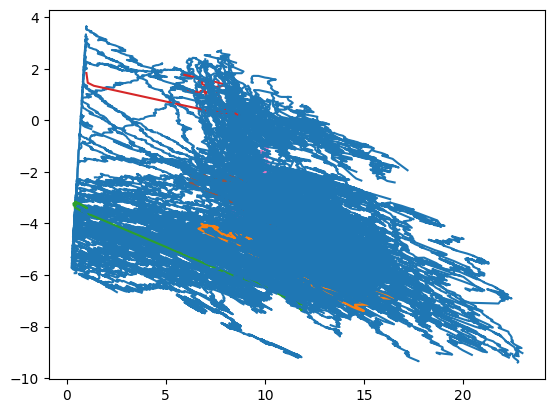

In [65]:
XTrain = XTrain.reshape(-1, traj_len, 2)
for i in range(XTrain.shape[0]):
    plt.plot(XTrain[i, :, 0], XTrain[i, :, 1], c=sns.color_palette()[cluster_labels[i]])

In [66]:


linkage_types = ['ward','complete', 'average', 'single']

for i, linkage in enumerate(linkage_types, 1):

    agglo_clustering = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage=linkage )

    # Fit the model and predict cluster labels for XDIFF
    cluster_labels = agglo_clustering.fit_predict(XDIFF)
    
    # Output the cluster labels to see the clustering result
    # print(cluster_labels)
    silhouette_avg = silhouette_score(XDIFF, cluster_labels)
    
    # Print the silhouette score
    print(f"For {linkage}, the average silhouette score is: {silhouette_avg}")

   

For ward, the average silhouette score is: 0.33057980321148084
For complete, the average silhouette score is: 0.4194250166423801
For average, the average silhouette score is: 0.47433778777391716
For single, the average silhouette score is: 0.47424285672201133


In [67]:


# Different linkage types
linkage_types = ['complete', 'average', 'single']

for i, linkage in enumerate(linkage_types, 1):

    agglo_clustering = AgglomerativeClustering(n_clusters=7, metric='manhattan', linkage=linkage )

    # Fit the model and predict cluster labels for XDIFF
    cluster_labels = agglo_clustering.fit_predict(XDIFF)
    
    # Output the cluster labels to see the clustering result
    # print(cluster_labels)
    silhouette_avg = silhouette_score(XDIFF, cluster_labels)
    
    # Print the silhouette score
    print(f"For {linkage}, the average silhouette score is: {silhouette_avg}")

   

For complete, the average silhouette score is: 0.3788987659280705
For average, the average silhouette score is: 0.36770702586309717
For single, the average silhouette score is: 0.36770702586309717
